In [ ]:
import tensorflow
from tensorflow import keras
from sklearn.datasets import fetch_openml
import numpy as np
from sklearn.model_selection import train_test_split
from keras.wrappers.scikit_learn import KerasClassifier 
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense

# from keras.optimizers import SGD
# from sklearn.datasets import fetch_openml
# from sklearn.model_selection import train_test_split
# from keras.callbacks import EarlyStopping
# import matplotlib.pyplot as plt

In [27]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
X = X.values
y = y.astype(int).values

print(X.shape)
print(y.shape)


(70000, 784)
(70000,)


normalization

In [28]:
# Normalize to [-1, 1] range
X = ((X / 255.) - .5) * 2

In [29]:
def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary

spliting the data

In [30]:

# Split into training, validation, and test set:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=123, stratify=y)

X_test, X_valid, y_test, y_valid = train_test_split(
    X_temp, y_temp, test_size=0.3, random_state=123, stratify=y_temp)


#optional to free up some memory by deleting non-used arrays:
del X_temp, y_temp

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
first_layer_nodes = 500
num_classes=10

model = Sequential()
model.add(Dense(first_layer_nodes, input_dim = X_train.shape[1], activation="sigmoid"))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])


In [33]:
y_train_onehot=int_to_onehot(y_train,10)
y_valid_onehot=int_to_onehot(y_valid,10)
history = model.fit(X_train, y_train_onehot, batch_size=200, epochs=50, validation_data=[X_valid, y_valid_onehot])


Epoch 1/50
245/245 [==============================] - 3s 4ms/step - loss: 1.8238 - accuracy: 0.5576 - val_loss: 1.3990 - val_accuracy: 0.7522
Epoch 2/50
245/245 [==============================] - 1s 3ms/step - loss: 1.1569 - accuracy: 0.7911 - val_loss: 0.9726 - val_accuracy: 0.8167
Epoch 3/50
245/245 [==============================] - 1s 3ms/step - loss: 0.8596 - accuracy: 0.8276 - val_loss: 0.7739 - val_accuracy: 0.8444
Epoch 4/50
245/245 [==============================] - 1s 3ms/step - loss: 0.7103 - accuracy: 0.8464 - val_loss: 0.6628 - val_accuracy: 0.8527
Epoch 5/50
245/245 [==============================] - 1s 3ms/step - loss: 0.6226 - accuracy: 0.8578 - val_loss: 0.5939 - val_accuracy: 0.8616
Epoch 6/50
245/245 [==============================] - 1s 3ms/step - loss: 0.5647 - accuracy: 0.8642 - val_loss: 0.5462 - val_accuracy: 0.8683
Epoch 7/50
245/245 [==============================] - 1s 3ms/step - loss: 0.5238 - accuracy: 0.8706 - val_loss: 0.5120 - val_accuracy: 0.8721
Epoch 

In [34]:
from scipy.special import softmax
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
pred = softmax(y_pred, axis=1)
macro_auc = roc_auc_score(y_test, pred, average='macro',multi_class='ovr')

print("keras Macro ROC AUC:")
print(macro_auc)

from sklearn.metrics import accuracy_score

y_pred = np.argmax(y_pred, axis=1)
test_acc = accuracy_score(y_test, y_pred)

print(f'Test accuracy: {test_acc*100:.2f}%')

keras Macro ROC AUC:
0.9929695042826255
Test accuracy: 91.31%


In [35]:
accuracy=history.history['accuracy']
loss=history.history['loss']
val_accuracy=history.history['val_accuracy']
val_loss=history.history['val_loss']


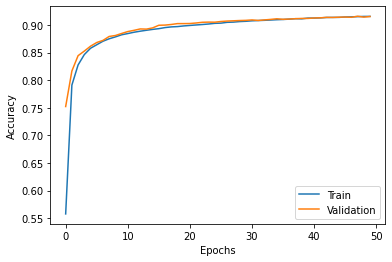

In [36]:
plt.plot(accuracy,label='Train')
plt.plot(val_accuracy,label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()

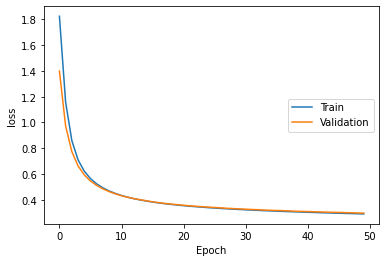

In [37]:
plt.plot(loss,label='Train')
plt.plot(val_loss,label='Validation')
plt.ylabel('loss')
plt.xlabel('Epoch')
plt.legend(loc='right')
plt.show()

**ch11** - one layer

In [23]:

from ch11_one_layer_PythonFile import epoch_loss,epoch_train_acc,epoch_valid_acc, macro_auc
epoch_loss_1,epoch_train_acc_1,epoch_valid_acc_1,macro_auc_1=epoch_loss,epoch_train_acc,epoch_valid_acc ,macro_auc
print("one layer Macro ROC AUC:")
print(macro_auc_1)

one layer Macro ROC AUC:
0.9965291587228083


**ch11** - 2 layers

In [25]:
from chr11_two_layers_PythonFile import epoch_loss,epoch_train_acc,epoch_train_acc
epoch_loss_2,epoch_train_acc_2,epoch_valid_acc_2,macro_auc_2=epoch_loss,epoch_train_acc,epoch_valid_acc,macro_auc
print("2 layers Macro ROC AUC:")
print(macro_auc_1)


2 layers Macro ROC AUC:
0.9965291587228083


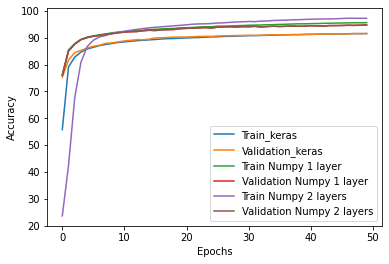

In [43]:
accuracy=[i*100 for i in accuracy]
val_accuracy=[i*100 for i in val_accuracy]

plt.plot(accuracy,label='Train_keras')
plt.plot(val_accuracy,label='Validation_keras')

plt.plot(epoch_train_acc_1,label='Train Numpy 1 layer')
plt.plot(epoch_valid_acc_1,label='Validation Numpy 1 layer')

plt.plot(epoch_train_acc_2,label='Train Numpy 2 layers')
plt.plot(epoch_valid_acc_2,label='Validation Numpy 2 layers')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
plt.show()